1. Laden von Daten und Bibliotheken

In [9]:

import config
import preprocessing_functions as pf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import text

#Verbindung zur DB aufbauen mit preprocessing function
pf.db_connect(config.db_name)

SQLquery = text('SELECT * FROM ' + config.db_weather_history + ' AS w JOIN ' + config.db_AQI_history + ' AS aqi ON w."datetime" = aqi."Datum"')
data = pd.read_sql(SQLquery, con=config.db_login.connect())


2. Überblick über die Daten

In [3]:
# Spaltennamen und Datentypen anzeigen
print(data.columns)

# Ersten fünf Zeilen der Daten anzeigen
print(data.head())

# Statistische Zusammenfassung anzeigen
print(data.describe())

Index(['name', 'datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise',
       'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations',
       'SMA_temp7', 'SMA_temp14', 'SMA_temp30', 'SMA_humidity7',
       'SMA_humidity14', 'SMA_humidity30', 'Temp_Range', 'Season',
       'Weather_Type', 'Datum', 'Standort', 'Parameter', 'Intervall',
       'Einheit', 'Wert', 'Status'],
      dtype='object')
                      name  datetime  tempmax  tempmin  temp  feelslikemax  \
0  Zch_Stampfenbachstrasse  04.01.01      6.6      0.1   3.3           4.0   
1  Zch_Stampfenbachstrasse  05.01.01      7.3      1.1   4.3           6.4   
2  Zch_Stampfenbachstrasse  06.01.01      8.2     

3. Visualisierung von Daten

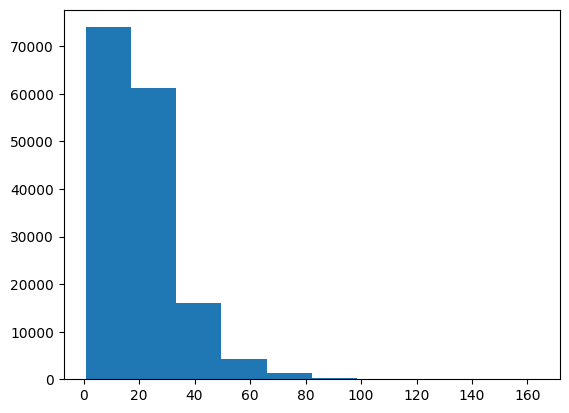

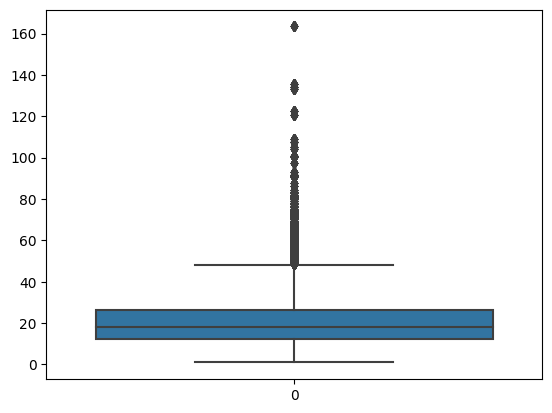

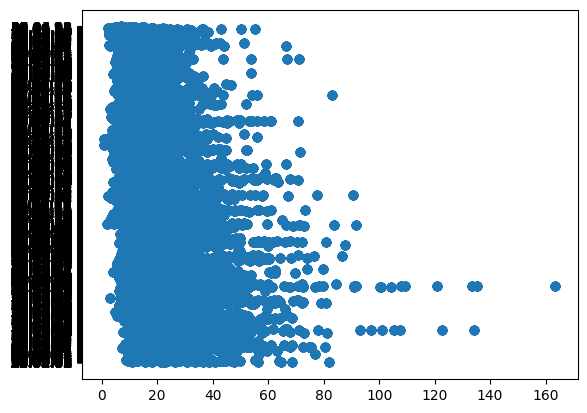

In [4]:
# Histogramm
plt.hist(data['Wert'])
plt.show()

# Boxplot
sns.boxplot(data['Wert'])
plt.show()

# Scatterplot
plt.scatter(data['Wert'], data['Datum'])
plt.show()


4. Korrelationsmatrix erzeugen

In [5]:
# Korrelationsmatrix
csv_file_path = 'merged_tables.csv'
df = pd.read_csv(csv_file_path)

# Nur numerische Spalten auswählen 
numeric_columns = df.select_dtypes(include='number')

# Erstellen der Korrelationsmatrix
correlation_matrix = numeric_columns.corr()
correlation_table = correlation_matrix.style.background_gradient(cmap='coolwarm')
correlation_table

c:\Users\stump\anaconda3\envs\ADSenv\lib\site-packages\pandas\io\formats\style.py:3931: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
c:\Users\stump\anaconda3\envs\ADSenv\lib\site-packages\pandas\io\formats\style.py:3932: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase,SMA_temp7,SMA_temp14,SMA_temp30,SMA_humidity7,SMA_humidity14,SMA_humidity30,Temp_Range,Unnamed: 42,Wert
tempmax,1.000000,0.915963,0.981893,0.995377,0.922452,0.978607,0.873184,-0.521186,-0.015664,-0.083968,-0.133229,-0.233863,-0.355612,-0.000573,-0.061322,0.070670,-0.111658,-0.417554,0.344637,0.730347,0.730112,0.720293,0.366152,0.020841,0.900583,0.865026,0.823300,-0.532857,-0.551039,-0.620868,0.712473,nan,-0.160981
tempmin,0.915963,1.000000,0.970482,0.915047,0.988363,0.964461,0.961962,-0.283757,0.116208,0.102197,0.028491,-0.225855,-0.377501,0.041283,-0.025453,0.135688,-0.171222,-0.155326,0.279284,0.574675,0.574405,0.550991,0.339348,0.023081,0.928644,0.898784,0.870191,-0.394297,-0.433803,-0.525201,0.371034,nan,-0.270145
temp,0.981893,0.970482,1.000000,0.978604,0.968938,0.994487,0.928995,-0.437091,0.042263,-0.004940,-0.063627,-0.234893,-0.369249,0.022982,-0.041016,0.100911,-0.142969,-0.305159,0.327472,0.679204,0.678922,0.658758,0.360554,0.022109,0.932962,0.898666,0.861034,-0.489226,-0.515521,-0.594773,0.575231,nan,-0.219329
feelslikemax,0.995377,0.915047,0.978604,1.000000,0.927305,0.982964,0.877924,-0.499827,-0.016649,-0.088534,-0.137618,-0.243518,-0.363019,-0.035750,-0.100307,0.065368,-0.102477,-0.412367,0.333340,0.725703,0.725446,0.716583,0.356786,0.021240,0.899393,0.864862,0.824398,-0.519542,-0.541702,-0.614755,0.703376,nan,-0.144658
feelslikemin,0.922452,0.988363,0.968938,0.927305,1.000000,0.974965,0.960234,-0.280244,0.092138,0.070738,-0.002937,-0.237140,-0.381982,-0.028426,-0.104120,0.136197,-0.140548,-0.190402,0.270249,0.585629,0.585400,0.565606,0.332864,0.021978,0.924061,0.894975,0.868857,-0.386366,-0.427764,-0.520796,0.406400,nan,-0.230425
feelslike,0.978607,0.964461,0.994487,0.982964,0.974965,1.000000,0.930795,-0.414909,0.032926,-0.020778,-0.079196,-0.245384,-0.377242,-0.034912,-0.104074,0.096324,-0.122927,-0.314004,0.312477,0.678447,0.678176,0.660378,0.352198,0.022097,0.928440,0.895818,0.860738,-0.472927,-0.503395,-0.586224,0.578156,nan,-0.189401
dew,0.873184,0.961962,0.928995,0.877924,0.960234,0.930795,1.000000,-0.077353,0.183261,0.149071,0.084546,-0.212350,-0.364920,-0.008013,-0.078669,0.134121,-0.173662,-0.114824,0.194842,0.486182,0.485885,0.461248,0.315741,0.018891,0.897817,0.877092,0.865520,-0.249274,-0.308367,-0.419008,0.338550,nan,-0.254870
humidity,-0.521186,-0.283757,-0.437091,-0.499827,-0.280244,-0.414909,-0.077353,1.000000,0.339692,0.358135,0.380267,0.130750,0.117422,-0.119625,-0.119295,0.042726,-0.030380,0.522760,-0.433884,-0.619802,-0.619747,-0.632365,-0.149515,-0.012818,-0.336158,-0.294476,-0.220058,0.714173,0.640865,0.584620,-0.709937,nan,-0.010974
precip,-0.015664,0.116208,0.042263,-0.016649,0.092138,0.032926,0.183261,0.339692,1.000000,0.400877,0.531871,0.112501,0.007664,0.259110,0.210766,0.201639,-0.235588,0.323134,-0.060326,-0.186404,-0.186757,-0.211829,0.049477,-0.025196,0.105809,0.103748,0.097242,0.036858,-0.004385,-0.039012,-0.239467,nan,-0.287357
precipprob,-0.083968,0.102197,-0.004940,-0.088534,0.070738,-0.020778,0.149071,0.358135,0.400877,1.000000,0.557908,0.114202,0.058268,0.343204,0.288086,0.310427,-0.304885,0.473902,-0.015969,-0.260577,-0.260773,-0.267347,0.065823,-0.007474,0.048486,0.047685,0.043005,0.117340,0.067597,0.027652,-0.373038,nan,-0.412662


## Überprüfung von leeren Datensätzen

In [6]:
# Zähle die Anzahl der Datensätze im DataFrame
anzahl_datensätze = len(df)

# Gib die Anzahl der Datensätze aus
print(f"Die Anzahl der Datensätze Total beträgt: {anzahl_datensätze}")

# Erstelle eine boolesche Maske für leere Werte in den genannten Spalten
mask = df['Wert'].isnull() | df['precipprob'].isnull() | df['windgust'].isnull() | df['visibility'].isnull()

# Zähle die Anzahl der Datensätze mit leeren Werten in mindestens einer der Spalten
anzahl_leere_datensätze = mask.sum()

# Gib die Anzahl der Datensätze mit leeren Werten aus
print(f"Es gibt {anzahl_leere_datensätze} Datensätze mit leeren Werten in mindestens einer der Spalten 'Wert', 'preciprob', 'windgust' oder 'visibility'.")

Die Anzahl der Datensätze Total beträgt: 48900
Es gibt 12684 Datensätze mit leeren Werten in mindestens einer der Spalten 'Wert', 'preciprob', 'windgust' oder 'visibility'.
